<a href="https://colab.research.google.com/github/averyshepherd/crypto-climate-sentiment/blob/main/Tweet-Scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install snscrape

#Scrape 1000 tweets that contain "bitcoin" per week for 1 year

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import datetime
import time

limit = 1000

current_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2021, 1, 1)
delta = datetime.timedelta(days=7)

week_nums = []
tweets = []
w = 1
keywords = 'bitcoin'

while current_date <= end_date:
  query = keywords + ' since:' + current_date.isoformat() + ' until:' + (current_date + delta).isoformat()
  for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i == limit:
      break;
    tweets.append(tweet.content)
    week_nums.append(w)
  current_date += delta
  print(w)
  w = w + 1
  time.sleep(5)

len(tweets)

1
2
3
4
5
6
7
8
9


Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=bitcoin+since%3A2020-03-04+until%3A2020-03-10&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaAwL3VtsefqyIWgsC1zZCJpqsiEnEV6P94FYCJehgEVVNFUjUBFVgVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: ConnectionError(ProtocolError('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))), retrying


10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53


['Best bitcoin app in the world  https://t.co/k7Wr2CCkVu. #Bitcoin #dollars #EasyMoney',
 'Am still buying BTC both bulk and units.... Attractive rate and swift payment assured....\nWhatsApp +2348107893722\n#cryptotrading #BTC #Bitcoin',
 'Nuovo post su Bitcoin News: ##Bitcoin #Miner #Mercato 2020 #Global #Industry #Size, #Segmenti, #Share e #Rapporto #Growth #Factor ... [https://t.co/Dvb7ExzC4o]  #Blockchain #Ethereum',
 'The #Bitcoin halvening is no where near priced in, if you move out beyond 2020\n\nBecause #Crypto is an exponential trend.\n\nMost people in the mainstream will be blind sided by this. Some #Crypto folk too.\n\n$BTC $ETH https://t.co/RMRrRhuPgA',
 'Bitcoin price index https://t.co/o7UcHJUhC6 #USD #EUR #CNY #GBP #RUB https://t.co/Tls5BwSOOu',
 "The SEC will approve or reject Wilshire Phoenix's bitcoin and U.S. Treasury ETF proposal next year. #bitcoin https://t.co/pZGRcFa77C https://t.co/bfxxQZROM7",
 'Bitcoin Vs. Dinero del gobierno: uno es claramente superior\nhttps

#Put tweets into a dataframe and calculate sentiment values for each Tweet

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

d = {'Week': week_nums, 'Tweet': tweets}
df = pd.DataFrame(data=d)

sia = SentimentIntensityAnalyzer()

sentiments = []
for i, row in df.iterrows():
  sentiments.append(sia.polarity_scores(row['Tweet'])['compound'])

df['Sentiment'] = sentiments
df.to_csv('Tweets.csv')
df.head

<bound method NDFrame.head of        Unnamed: 0  ...  Sentiment
0               0  ...     0.6369
1               1  ...     0.5719
2               2  ...     0.0000
3               3  ...    -0.5994
4               4  ...     0.0000
...           ...  ...        ...
52015       52015  ...     0.0000
52016       52016  ...     0.3899
52017       52017  ...     0.6948
52018       52018  ...     0.0000
52019       52019  ...     0.0000

[52020 rows x 4 columns]>

In [ ]:
#df = pd.read_csv('Tweets.csv')
#df

,Unnamed: 0,Unnamed: 0.1,Week,Tweet,Sentiment
0,0,0,1,Best bitcoin app in the world https://t.co/k7...,0.6369
1,1,1,1,Am still buying BTC both bulk and units.... At...,0.5719
2,2,2,1,Nuovo post su Bitcoin News: ##Bitcoin #Miner #...,0.0000
3,3,3,1,The #Bitcoin halvening is no where near priced...,-0.5994
4,4,4,1,Bitcoin price index https://t.co/o7UcHJUhC6 #U...,0.0000
...,...,...,...,...,...
52015,52015,52015,53,@Andre_S_Duarte bitcoin nada mais é um ativo t...,0.0000
52016,52016,52016,53,@NikolaTeslaNews How are they going to confisc...,0.3899
52017,52017,52017,53,@cperruna @saxena_puru @Hust_cool @coinbase @G...,0.6948
52018,52018,52018,53,@zerohedge How can you short Bitcoin?,0.0000


#Get BitCoin stock prices

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

tickerSymbol = 'BTC-USD'

tickerData = yf.Ticker(tickerSymbol)

tickerDf = tickerData.history( start='2020-1-1', end='2021-1-1')

tickerDf['Week'] = tickerDf.index.isocalendar()['week']

tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Week
Date,,,,,,,,
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,28111481032,0,0,1
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,18444271275,0,0,1
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,19725074095,0,0,1
2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,23276261598,0,0,2
2020-01-07,7768.682129,8178.215820,7768.227539,8163.692383,28767291327,0,0,2
...,...,...,...,...,...,...,...,...
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,49056742893,0,0,53
2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,45265946774,0,0,53
2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,51287442704,0,0,53


#Scale the data so we can plot them together

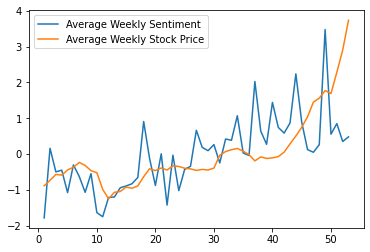

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

sentiments = df.groupby(['Week']).mean()['Sentiment']
prices = tickerDf.groupby(['Week']).mean()['Open']

scaler = StandardScaler()

scaled_sentiments = scaler.fit_transform(sentiments.values.reshape(-1, 1))
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

plt.plot(sentiments.index, scaled_sentiments, label='Average Weekly Sentiment')

plt.plot(prices.index, scaled_prices, label='Average Weekly Stock Price')
plt.legend()

#Lets try getting daily tweets

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import datetime
import time

limit = 2000

current_date = datetime.date(2021, 3, 1)
end_date = datetime.date(2021, 5, 30)
delta = datetime.timedelta(days=1)

dates = []
tweets = []
w = 1
keywords = 'ethereum climate'

while current_date <= end_date:
  query = keywords + ' since:' + current_date.isoformat() + ' until:' + (current_date + delta).isoformat()
  for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i == limit:
      break;
    tweets.append(tweet.content)
    dates.append(tweet.date)
  current_date += delta
  if w % 10 == 0:
    print(w)
  w += 1
  time.sleep(5)

print(len(tweets))
df = pd.DataFrame(data={'Date': dates, 'Tweet': tweets})
df.to_csv('Tweets_Ethereum_Climate.csv')

10
20
30
40
50
60
70
80
90
563


In [ ]:
df = pd.DataFrame(data={'Date': dates, 'Tweet': tweets})
df.to_csv('Tweets_Bitcoin_Climate.csv')

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

df = pd.DataFrame(data={'Date': dates, 'Tweet': tweets})

sia = SentimentIntensityAnalyzer()

sentiments = []
for i, row in df.iterrows():
  sentiments.append(sia.polarity_scores(row['Tweet'])['compound'])

df['Sentiment'] = sentiments
df.to_csv('Tweets_Daily.csv')
df.head

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


<bound method NDFrame.head of                            Date  ... Sentiment
0     2020-01-01 23:59:58+00:00  ...    0.4939
1     2020-01-01 23:59:34+00:00  ...    0.0000
2     2020-01-01 23:59:33+00:00  ...    0.0000
3     2020-01-01 23:59:25+00:00  ...    0.0000
4     2020-01-01 23:59:24+00:00  ...    0.2023
...                         ...  ...       ...
55045 2021-01-01 23:53:50+00:00  ...   -0.1531
55046 2021-01-01 23:53:49+00:00  ...    0.0000
55047 2021-01-01 23:53:45+00:00  ...    0.0000
55048 2021-01-01 23:53:40+00:00  ...   -0.3595
55049 2021-01-01 23:53:39+00:00  ...    0.5106

[55050 rows x 3 columns]>

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=e27987be0826fd854934a658595d24865edbac9decfffdac51df47c83b266f72
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf

tickerSymbol = 'BTC-USD'

tickerData = yf.Ticker(tickerSymbol)

tickerDf = tickerData.history( start='2020-1-1', end='2021-1-1')

tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,18565664997,0,0
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,20802083465,0,0
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,28111481032,0,0
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,18444271275,0,0
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,19725074095,0,0
...,...,...,...,...,...,...,...
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,49056742893,0,0
2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,45265946774,0,0
2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,51287442704,0,0


In [ ]:
df = pd.read_csv('Tweets_Daily.csv')

df = df.dropna()

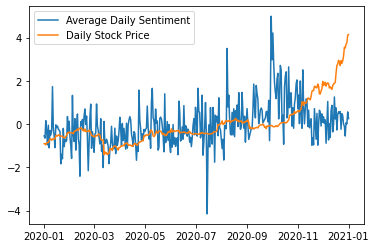

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Strip the time off the tweet datetimes
dates_no_time = []
for dt in df['Date']:
  dates_no_time.append(datetime.datetime.strptime(dt[0:10], '%Y-%m-%d'))

df['Date'] = dates_no_time

sentiments = df.groupby(['Date']).mean()['Sentiment']
prices = tickerDf['Open']

scaler = StandardScaler()

scaled_sentiments = scaler.fit_transform(sentiments.values.reshape(-1, 1))
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

plt.plot(sentiments.index, scaled_sentiments, label='Average Daily Sentiment')

plt.plot(prices.index, scaled_prices, label='Daily Stock Price')
plt.legend()